###### Imports

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.font_manager
import seaborn as sns
from sklearn.linear_model import LinearRegression
from warnings import simplefilter
simplefilter("ignore")  # ignore warnings to clean up output cells

In [11]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv('../output/csv/decadeCBSAs.csv')
df.head()

,NAME,CBSA,GEOID,year,geoyearID,total,child,taxbase,O65,Pchild,Ptaxbase,PO65,homevalue,State,MetroMicro,CBSAFIPS,popdensity,O65popdensity,tbpopdensity,childpopdensity
0,"Athens-Clarke County, GA","Athens-Clarke County, GA Metro Area",310M100US12020,2010,310M100US120202010,192738,40837,132080,19821,21.2,68.5,10.3,160200,GA,Metro,12020,188.047757,19.338660,128.865858,39.843239
1,"Athens-Clarke County, GA","Athens-Clarke County, GA Metro Area",310M100US12020,2011,310M100US120202011,193317,39216,133321,20780,20.3,69.0,10.7,163600,GA,Metro,12020,188.612667,20.274323,130.076658,38.261686
2,"Athens-Clarke County, GA","Athens-Clarke County, GA Metro Area",310M100US12020,2012,310M100US120202012,194337,39979,131774,22584,20.6,67.8,11.6,159500,GA,Metro,12020,189.607845,22.034423,128.567304,39.006118
3,"Athens-Clarke County, GA","Athens-Clarke County, GA Metro Area",310M200US12020,2013,310M200US120202013,197357,39358,135387,22612,19.9,68.6,11.5,154500,GA,Metro,12020,192.554354,22.061741,132.092383,38.400230
4,"Athens-Clarke County, GA","Athens-Clarke County, GA Metro Area",310M200US12020,2014,310M200US120202014,197268,39567,134509,23192,20.1,68.2,11.8,153200,GA,Metro,12020,192.467520,22.627627,131.235748,38.604144


Group by years

In [22]:
DF = df.groupby(['year']).mean()

In [23]:
DF

,total,child,taxbase,O65,Pchild,Ptaxbase,PO65,homevalue,CBSAFIPS,popdensity,O65popdensity,tbpopdensity,childpopdensity,Time
year,,,,,,,,,,,,,,
2010,525408.651731,126454.429735,332163.205703,66791.016293,23.341548,62.516904,14.138697,163125.254582,30128.635438,236.904350,33.108648,148.593438,55.202264,2512.067210
2011,525940.206061,125267.197980,332729.200000,67943.808081,23.093333,62.538182,14.368889,158661.818182,30062.949495,236.582129,33.620047,148.463242,54.498840,2509.034343
2012,529518.949597,124867.939516,333810.310484,70840.699597,22.910887,62.191734,14.896371,156683.467742,30044.717742,237.488056,34.979835,148.364219,54.144002,2507.072581
2013,558222.299803,130408.325444,351196.128205,76617.846154,22.716765,61.923669,15.357594,160667.455621,30094.398422,245.324085,37.120961,152.872307,55.330816,2531.954635
2014,563507.842209,130378.881657,353711.031558,79417.928994,22.528008,61.678107,15.793491,166563.905325,30094.398422,246.699404,38.365696,153.239197,55.094511,2532.954635
2015,567531.913386,130312.253937,355229.047244,81990.612205,22.393110,61.423425,16.184449,175312.992126,30058.582677,247.774210,39.475911,153.395312,54.902987,2532.190945
2016,568948.537255,129865.541176,354666.280392,84416.715686,22.264706,61.102549,16.633725,182978.823529,30027.490196,247.968097,40.614785,152.827785,54.525527,2526.766667
2017,573957.319608,129906.460784,356745.896078,87304.962745,22.151373,60.837647,17.009412,192536.470588,30048.941176,249.512325,41.840688,153.244378,54.427259,2529.582353
2018,575537.332681,129124.497065,356479.084149,89933.751468,21.942661,60.565949,17.490607,201628.767123,30074.716243,249.578098,43.022614,152.677549,53.877935,2534.129159


###### Create a `Time` dummy

In [25]:
DF['Time'] = np.arange(len(DF.index))
DF.head()

,total,child,taxbase,O65,Pchild,Ptaxbase,PO65,homevalue,CBSAFIPS,popdensity,O65popdensity,tbpopdensity,childpopdensity,Time
year,,,,,,,,,,,,,,
2010,525408.651731,126454.429735,332163.205703,66791.016293,23.341548,62.516904,14.138697,163125.254582,30128.635438,236.904350,33.108648,148.593438,55.202264,0
2011,525940.206061,125267.197980,332729.200000,67943.808081,23.093333,62.538182,14.368889,158661.818182,30062.949495,236.582129,33.620047,148.463242,54.498840,1
2012,529518.949597,124867.939516,333810.310484,70840.699597,22.910887,62.191734,14.896371,156683.467742,30044.717742,237.488056,34.979835,148.364219,54.144002,2
2013,558222.299803,130408.325444,351196.128205,76617.846154,22.716765,61.923669,15.357594,160667.455621,30094.398422,245.324085,37.120961,152.872307,55.330816,3
2014,563507.842209,130378.881657,353711.031558,79417.928994,22.528008,61.678107,15.793491,166563.905325,30094.398422,246.699404,38.365696,153.239197,55.094511,4


The procedure for fitting a linear regression model follows the standard steps for `skikit-learn`.

In [30]:
#Training data
X = DF.loc[:, ['Time']] #features
y = DF.loc[:, 'total'] #target

#Train the model
model = LinearRegression()
model.fit(X, y)

#Store the fitted values as a time series with the same time index as the training data
y_pred = pd.Series(model.predict(X), index=X.index)

Plot the fitted values over time showing how fitting a linear regression to the time dummy creates the trend line defined by the overall equation.

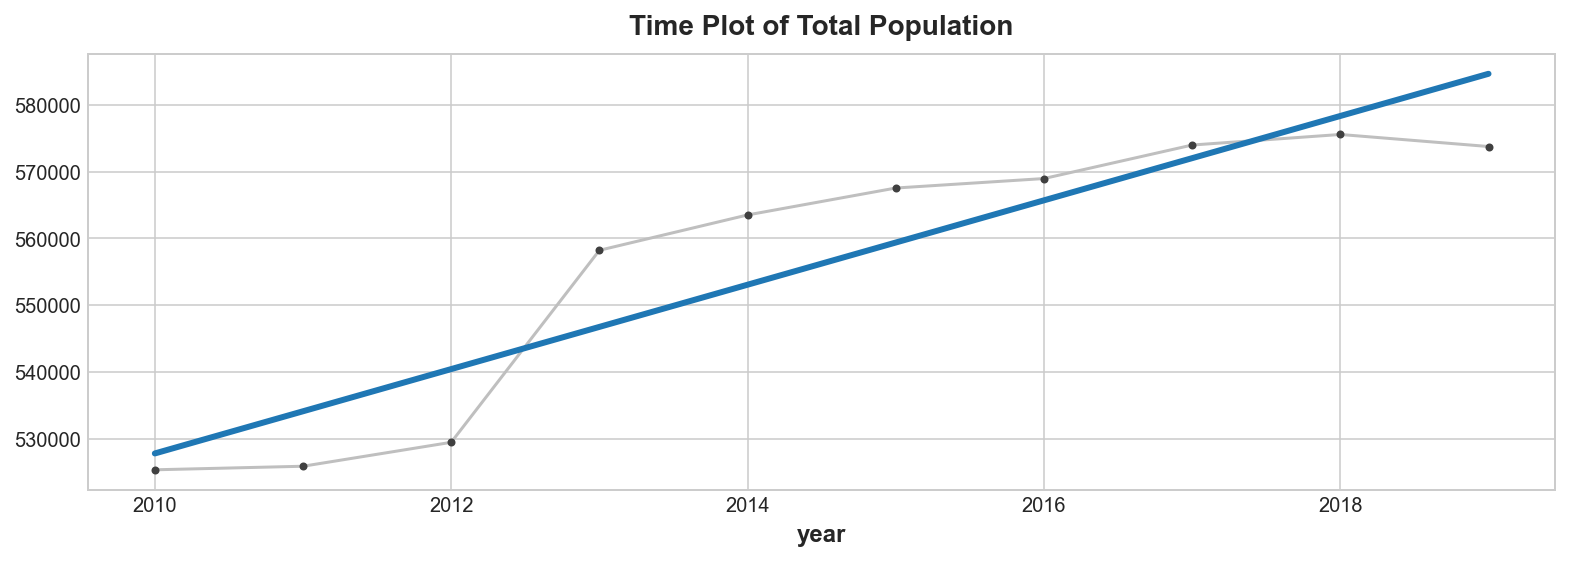

In [32]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Total Population');

In [17]:
#index into where the Nashville MSA is to check the rankings out
# nash = df.loc[df['CBSA'] == 'Nashville-Davidson--Murfreesboro--Franklin, TN Metro Area'].reset_index(drop = True)

In [33]:
#Training data
X = nash.loc[:, ['Time']] #features
y = nash.loc[:, 'O65'] #target

#Train the model
model = LinearRegression()
model.fit(X, y)

#Store the fitted values as a time series with the same time index as the training data
y_pred = pd.Series(model.predict(X), index=X.index)

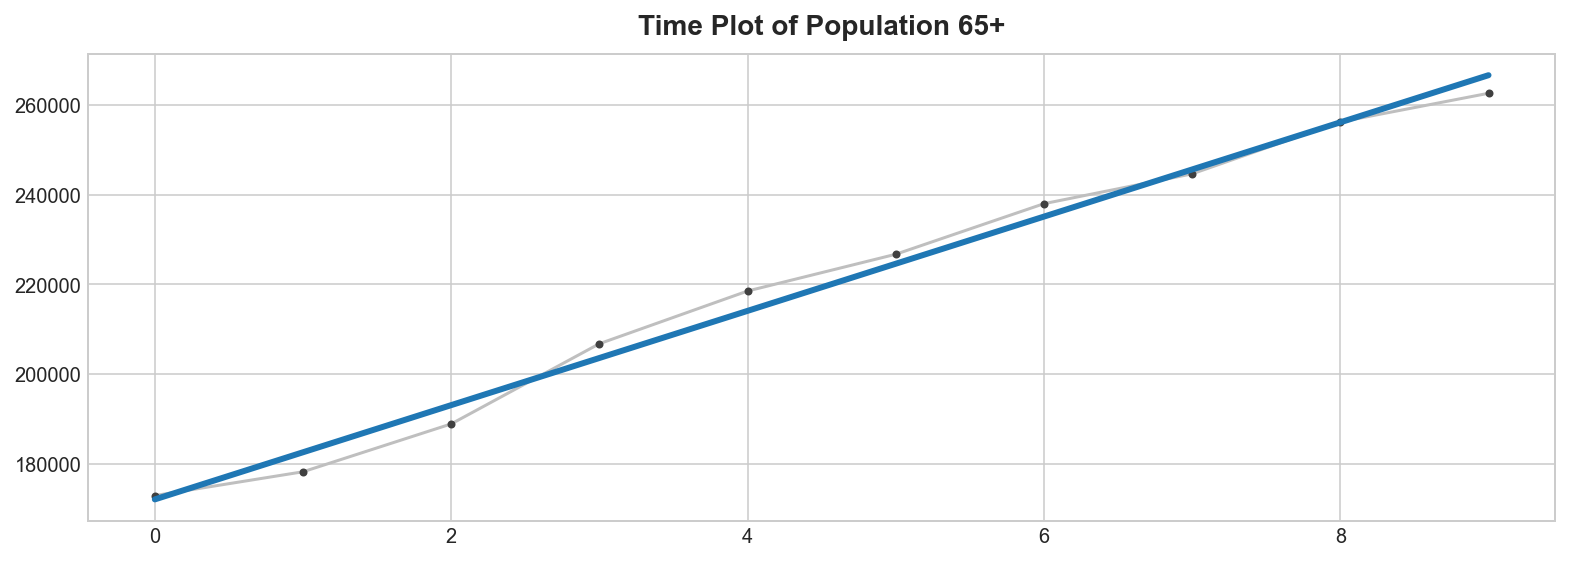

In [34]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Population 65+');